# Multiple Linear Regression

## Importing Necessary Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.metrics import mean_squared_error, r2_score

## Loading the Dataset

In [140]:
df = pd.read_csv("advertising.csv")

In [141]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [143]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [144]:
x = df.drop("Sales", axis = 1)
y = df["Sales"]

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 13)

In [146]:
lr = LinearRegression()
lr.fit(x_test, y_test)

LinearRegression()

In [147]:
y_pred = lr.predict(x_test)

In [148]:
(mean_squared_error(y_test, y_pred))**0.5

1.3802425461533048

In [149]:
r2_score(y_test, y_pred)

0.9369200565807528

In [158]:
coefficients = pd.DataFrame(lr.coef_, index = ["tv", "radio", "newspaper"], columns = ["coef"])

In [159]:
coefficients

,coef
tv,0.043246
radio,0.205961
newspaper,0.003956


In [160]:
# Here we passed our coefficients to the variables w1,w2,w3 and wrote them into a function
w1 = lr.coef_[0]
w2 = lr.coef_[1]
w3 = lr.coef_[2]
b = lr.intercept_
def formula(x1, x2, x3):
    return x1*w1 + x2*w2 + x3*w3 + b

In [161]:
# now we apply this function to our x_test
liste = []
for i in range(40):
    liste.append(formula(x_test.iloc[i][0], x_test.iloc[i][1], x_test.iloc[i][2]))

In [162]:
# Instead of doing (y_test, y_pred), this time we compared the list from our own function and the result is the same.
r2_score(y_test, liste)

0.9369200565807527

In [163]:
x_train

,TV,Radio,Newspaper
125,87.2,11.8,25.9
68,237.4,27.5,11.0
69,216.8,43.9,27.2
108,13.1,0.4,25.6
131,265.2,2.9,43.0
...,...,...,...
98,289.7,42.3,51.2
16,67.8,36.6,114.0
74,213.4,24.6,13.1
176,248.4,30.2,20.3


C:\Users\yskaraman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV', ylabel='Sales'>

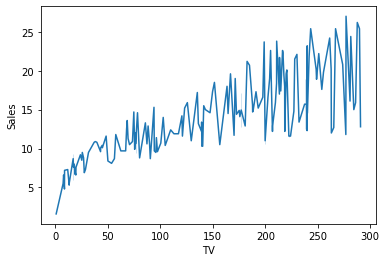

In [164]:
sns.lineplot("TV", y_train, data = x_train)

C:\Users\yskaraman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV', ylabel='Sales'>

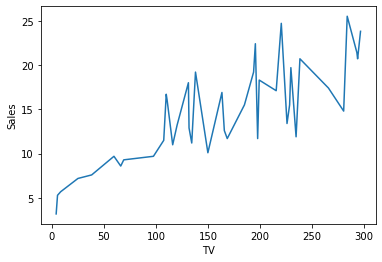

In [165]:
sns.lineplot("TV", y_test, data = x_test)

C:\Users\yskaraman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

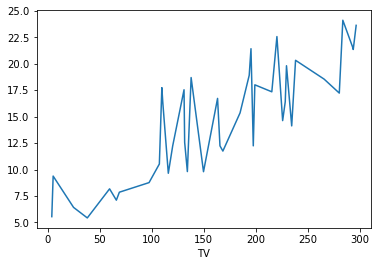

In [166]:
sns.lineplot("TV", y_pred, data = x_test)

### In this project, we had advertising data. But we didn't know which type of advertising contributed the most to sales. We performed Linear Regression, our accuracy rate was 93%. And by looking at the coefficients, we found our formula as

### formula = TV * 0.043246 + Radio * 0.205961 +  Newspaper * 0.003956 + 2.951541971471439

### In other words, the radio ads that contributed the most were TV ads, then newspaper ads. Now our company has realized that it needs to invest more money in radio advertisements and that newspaper advertisements are not profitable.